In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集，训练集比例0.2，设置随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM模型，使用线性核函数，设置随机种子42
svm_model = SVC(kernel='linear', random_state=42)

# 训练模型
svm_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm_model.predict(X_test)

# 计算评估指标

# 准确率
accuracy = accuracy_score(y_test, y_pred)

# 召回率
recall = recall_score(y_test, y_pred, average='macro')

# F1分数
f1 = f1_score(y_test, y_pred, average='macro')

# 混淆矩阵
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

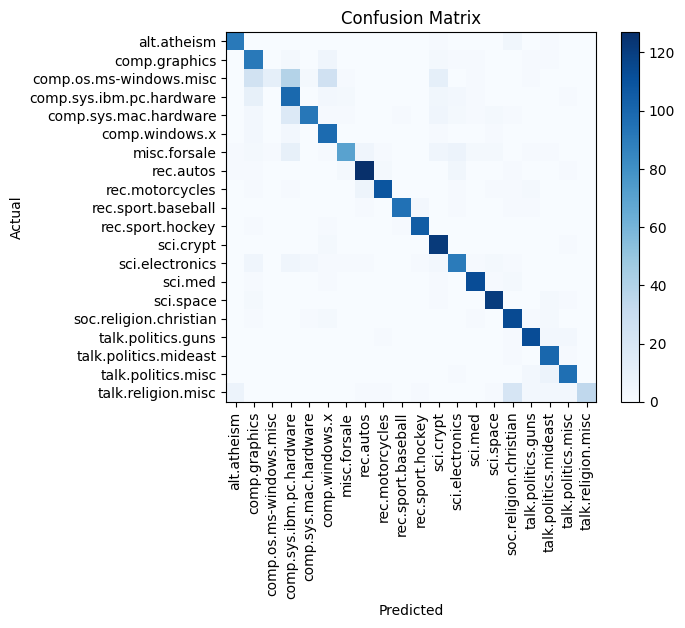

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


# 导入新闻数据集
newsdata = fetch_20newsgroups()

# 查看类别标签
print("类别标签:", newsdata.target_names)

# 查看数据集的描述
print("数据集描述:", newsdata.DESCR)

# 查看数据样本
print("数据样本:", newsdata.data[0])

# 将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsdata.data)

# 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, newsdata.target, test_size=0.2, random_state=42)

# 创建并训练朴素贝叶斯分类器
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = nb_model.predict(X_test)

# 计算评估指标

# 准确率
accuracy = accuracy_score(y_test, y_pred)

# 召回率
recall = recall_score(y_test, y_pred, average='macro')

# F1分数
f1 = f1_score(y_test, y_pred, average='macro')

# 混淆矩阵
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

# 绘制混淆矩阵
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(newsdata.target_names))
plt.xticks(tick_marks, newsdata.target_names, rotation=90)
plt.yticks(tick_marks, newsdata.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

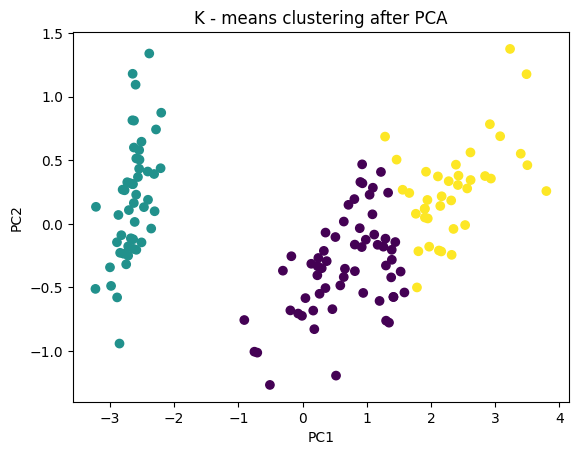

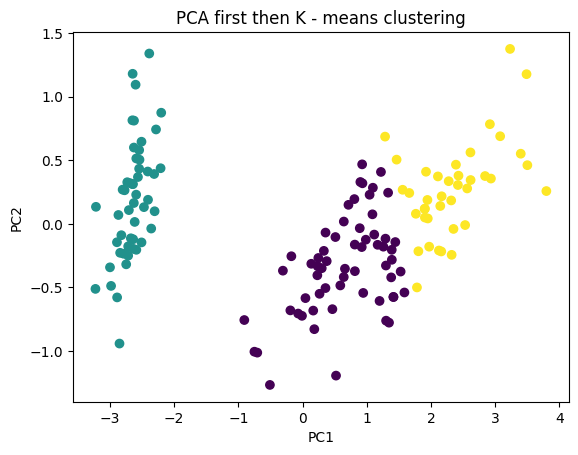

Silhouette score for direct clustering: 0.551191604619592
Silhouette score for PCA first then clustering: 0.5976764219547992


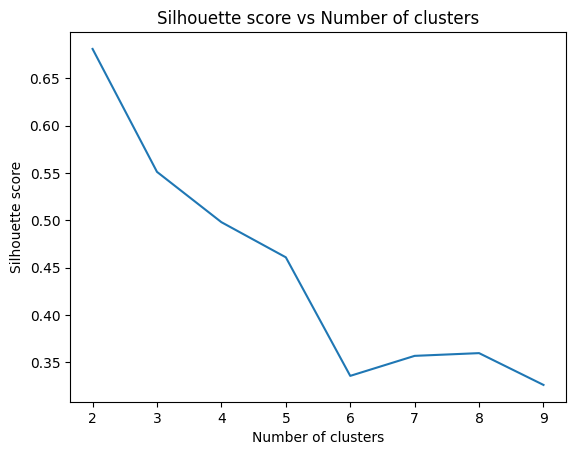

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 使用K - means聚类，分为3个簇，随机种子为0
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)
labels = kmeans.labels_

# PCA降维到2维空间
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# 可视化
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels)
plt.title("K - means clustering after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 先PCA降维
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# 再K - means聚类
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_pca)
labels = kmeans.labels_

# 可视化
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels)
plt.title("PCA first then K - means clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 直接聚类的轮廓系数
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print("Silhouette score for direct clustering:", silhouette_avg)

# 先降维再聚类的轮廓系数
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_pca)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette score for PCA first then clustering:", silhouette_avg)

# 尝试不同的聚类数
range_n_clusters = range(2, 10)
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# 绘制图形
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs Number of clusters")
plt.show()